# Animation and plots of the trajectories of the zeros of partial sums of Charlier polynomials

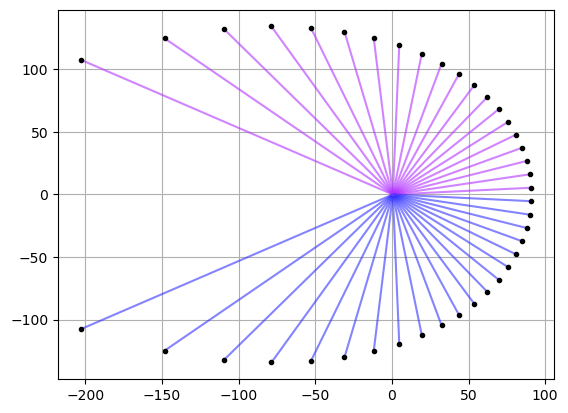

In [13]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# Specify the file path. The file is generated with the maple file 'Zeros-computations.maple' and contains the zeros of 
# the partial sums of Charlier polynomials
file_path = 'partial-Charlier40.txt'

# Load the data from the file into a NumPy array
data_array = np.loadtxt(file_path, delimiter='\t')
tmax, Nzeros = data_array.shape

# Create a figure and a subplot
fig, ax = plt.subplots()
ax.grid(True)

# Creates the plot of the trajectories and zeros
def plot_seq2(x, y,a,b):
    
    ## Create a line with gradient transparency
    #for i in range(len(x) - 1):
    #    ax.plot(x[i:i+2], y[i:i+2], linestyle='-', color=(a, b, 1, i / len(x)), linewidth=1.5)
    ax.plot(x, y, linestyle='-', color=(a, b, 1, 0.6), linewidth=1.5)

    # Highlight the last point with a solid circle
    ax.plot(x[-1], y[-1], 'o', color='black', markersize=3)

for i in range(0,Nzeros//4):
    plot_seq2(data_array[:,4*i].tolist(),data_array[:,4*i+1].tolist(),0.7,0.2)
    plot_seq2(data_array[:,4*i+2].tolist(),data_array[:,4*i+3].tolist(),0.2,0.2)

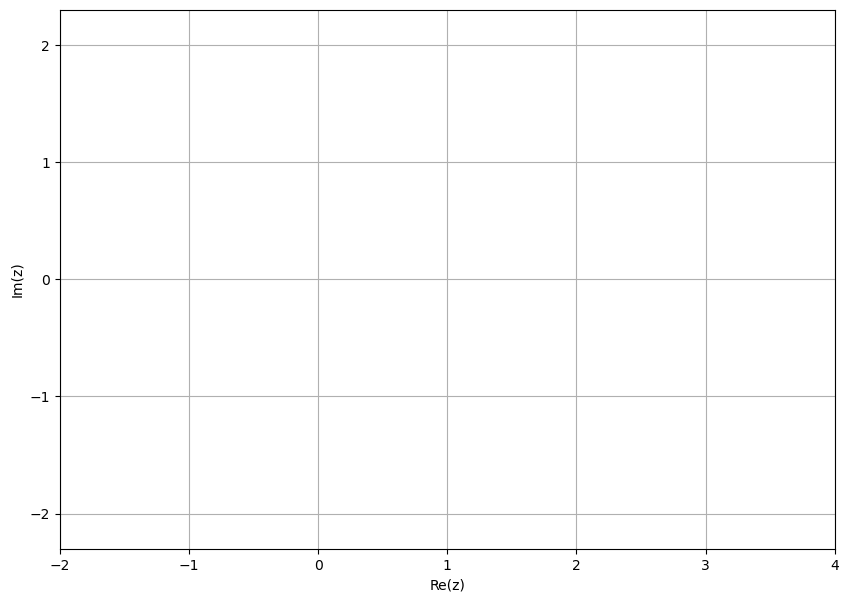

In [15]:
# The following code creates an animation for the trajectories of the zeros

fig, ax = plt.subplots(figsize=(10,7))

ax.grid(True)
ax.set(xlim=[-2, 4], ylim=[-2.3, 2.3], xlabel='Re(z)', ylabel='Im(z)')

def update(frame):
    ax.cla()
    for i in range (0,Nzeros//4):
        pict1 = ax.plot(data_array[:frame,4*i].tolist(),data_array[:frame,4*i+1].tolist(), color=(0.7, 0.2, 0.5), linewidth=1.5)
        pict2 = ax.plot(data_array[:frame,4*i+2].tolist(),data_array[:frame,4*i+3].tolist(), color=(0.2, 0.2, 0.5), linewidth=1.5)
        # Highlight the last point with a solid circle
        circles1 = ax.plot(data_array[frame-1,4*i],data_array[frame-1,4*i+1],'o', color='black', markersize=3)
        circles2 = ax.plot(data_array[frame-1,4*i+2],data_array[frame-1,4*i+3],'o', color='black', markersize=3)
    
    return (pict1, pict2 ,circles1, circles2)

ani = animation.FuncAnimation(fig=fig, func=update, frames=1000, interval=30)

ani.save(filename='animacion-C.mp4', writer='ffmpeg', fps=30)